In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
percentage_fraud = df['Class'].value_counts()
percentage_fraud

0    284315
1       492
Name: Class, dtype: int64

In [11]:
percentage_fraud = round(df['Class'].value_counts()[0]/len(df) * 100, 3)
percentage_nonFraud = round(df['Class'].value_counts()[1]/len(df) * 100, 3)
print(f"Fraud transaction: {percentage_fraud}%")
print(f"No Fraud transaction: {percentage_nonFraud}%")

Fraud transaction: 99.827%
No Fraud transaction: 0.173%


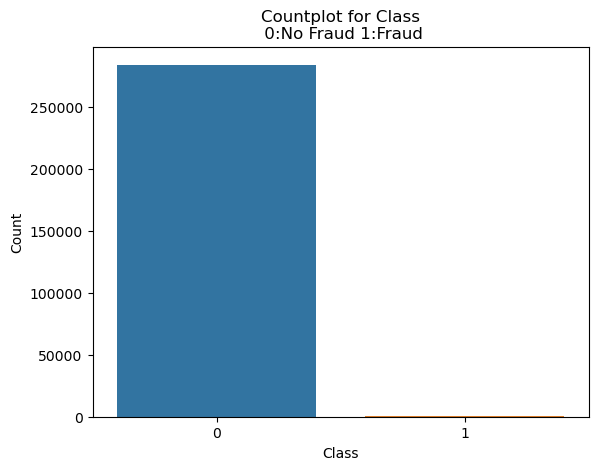

In [8]:
# Create a countplot
sns.countplot(data=df, x="Class")

# Set labels and title
plt.xlabel("Class")
plt.ylabel('Count')
plt.title('Countplot for Class\n 0:No Fraud 1:Fraud')

# Display the plot
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()


df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [12]:
# save the scaled data
df.to_csv('/kaggle/working/data_scaled.csv', index=False)

In [13]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df.iloc[:, :-1] # assuming "Class" is your last column
y = df['Class']

# Split the data, with 70% to training data and 30% to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# save the scaled data
data_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
data_test['Class'].value_counts()
data_test.to_csv('/kaggle/working/data_test.csv', index=False)

0    85307
1      136
Name: Class, dtype: int64

In [15]:
print(y_train.value_counts())
print(y_test.value_counts())

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64


In [18]:
# Apply SMOTE on training dataset
from imblearn.over_sampling import SMOTE
# define SMOTE 
sm = SMOTE(random_state=42)

# fit the sampling
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print('After OverSampling, the count of class 1 (Fraud): {}'.format(sum(y_res==1)))
print('After OverSampling, the count of class 0 (No Fraud): {}'.format(sum(y_res==0)))


After OverSampling, the count of class 1 (Fraud): 199008
After OverSampling, the count of class 0 (No Fraud): 199008


In [17]:
# Save the Training data after resample
# Combine the resampled features and target into a single DataFrame
df_resampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

# Set the column names back to original
df_resampled.columns = df.columns 

# shuffle the data
df_resampled = df_resampled.sample(frac=1, random_state=42)

# df_resampled.tail(10)
# Save the DataFrame to a CSV file
df_resampled.to_csv('/kaggle/working/data_train.csv', index=False)


In [21]:
new_df_train = pd.read_csv("/kaggle/input/dataset11/data_train.csv")
new_df_train.describe()
new_df_train['Class'].value_counts()

0    199008
1    199008
Name: Class, dtype: int64

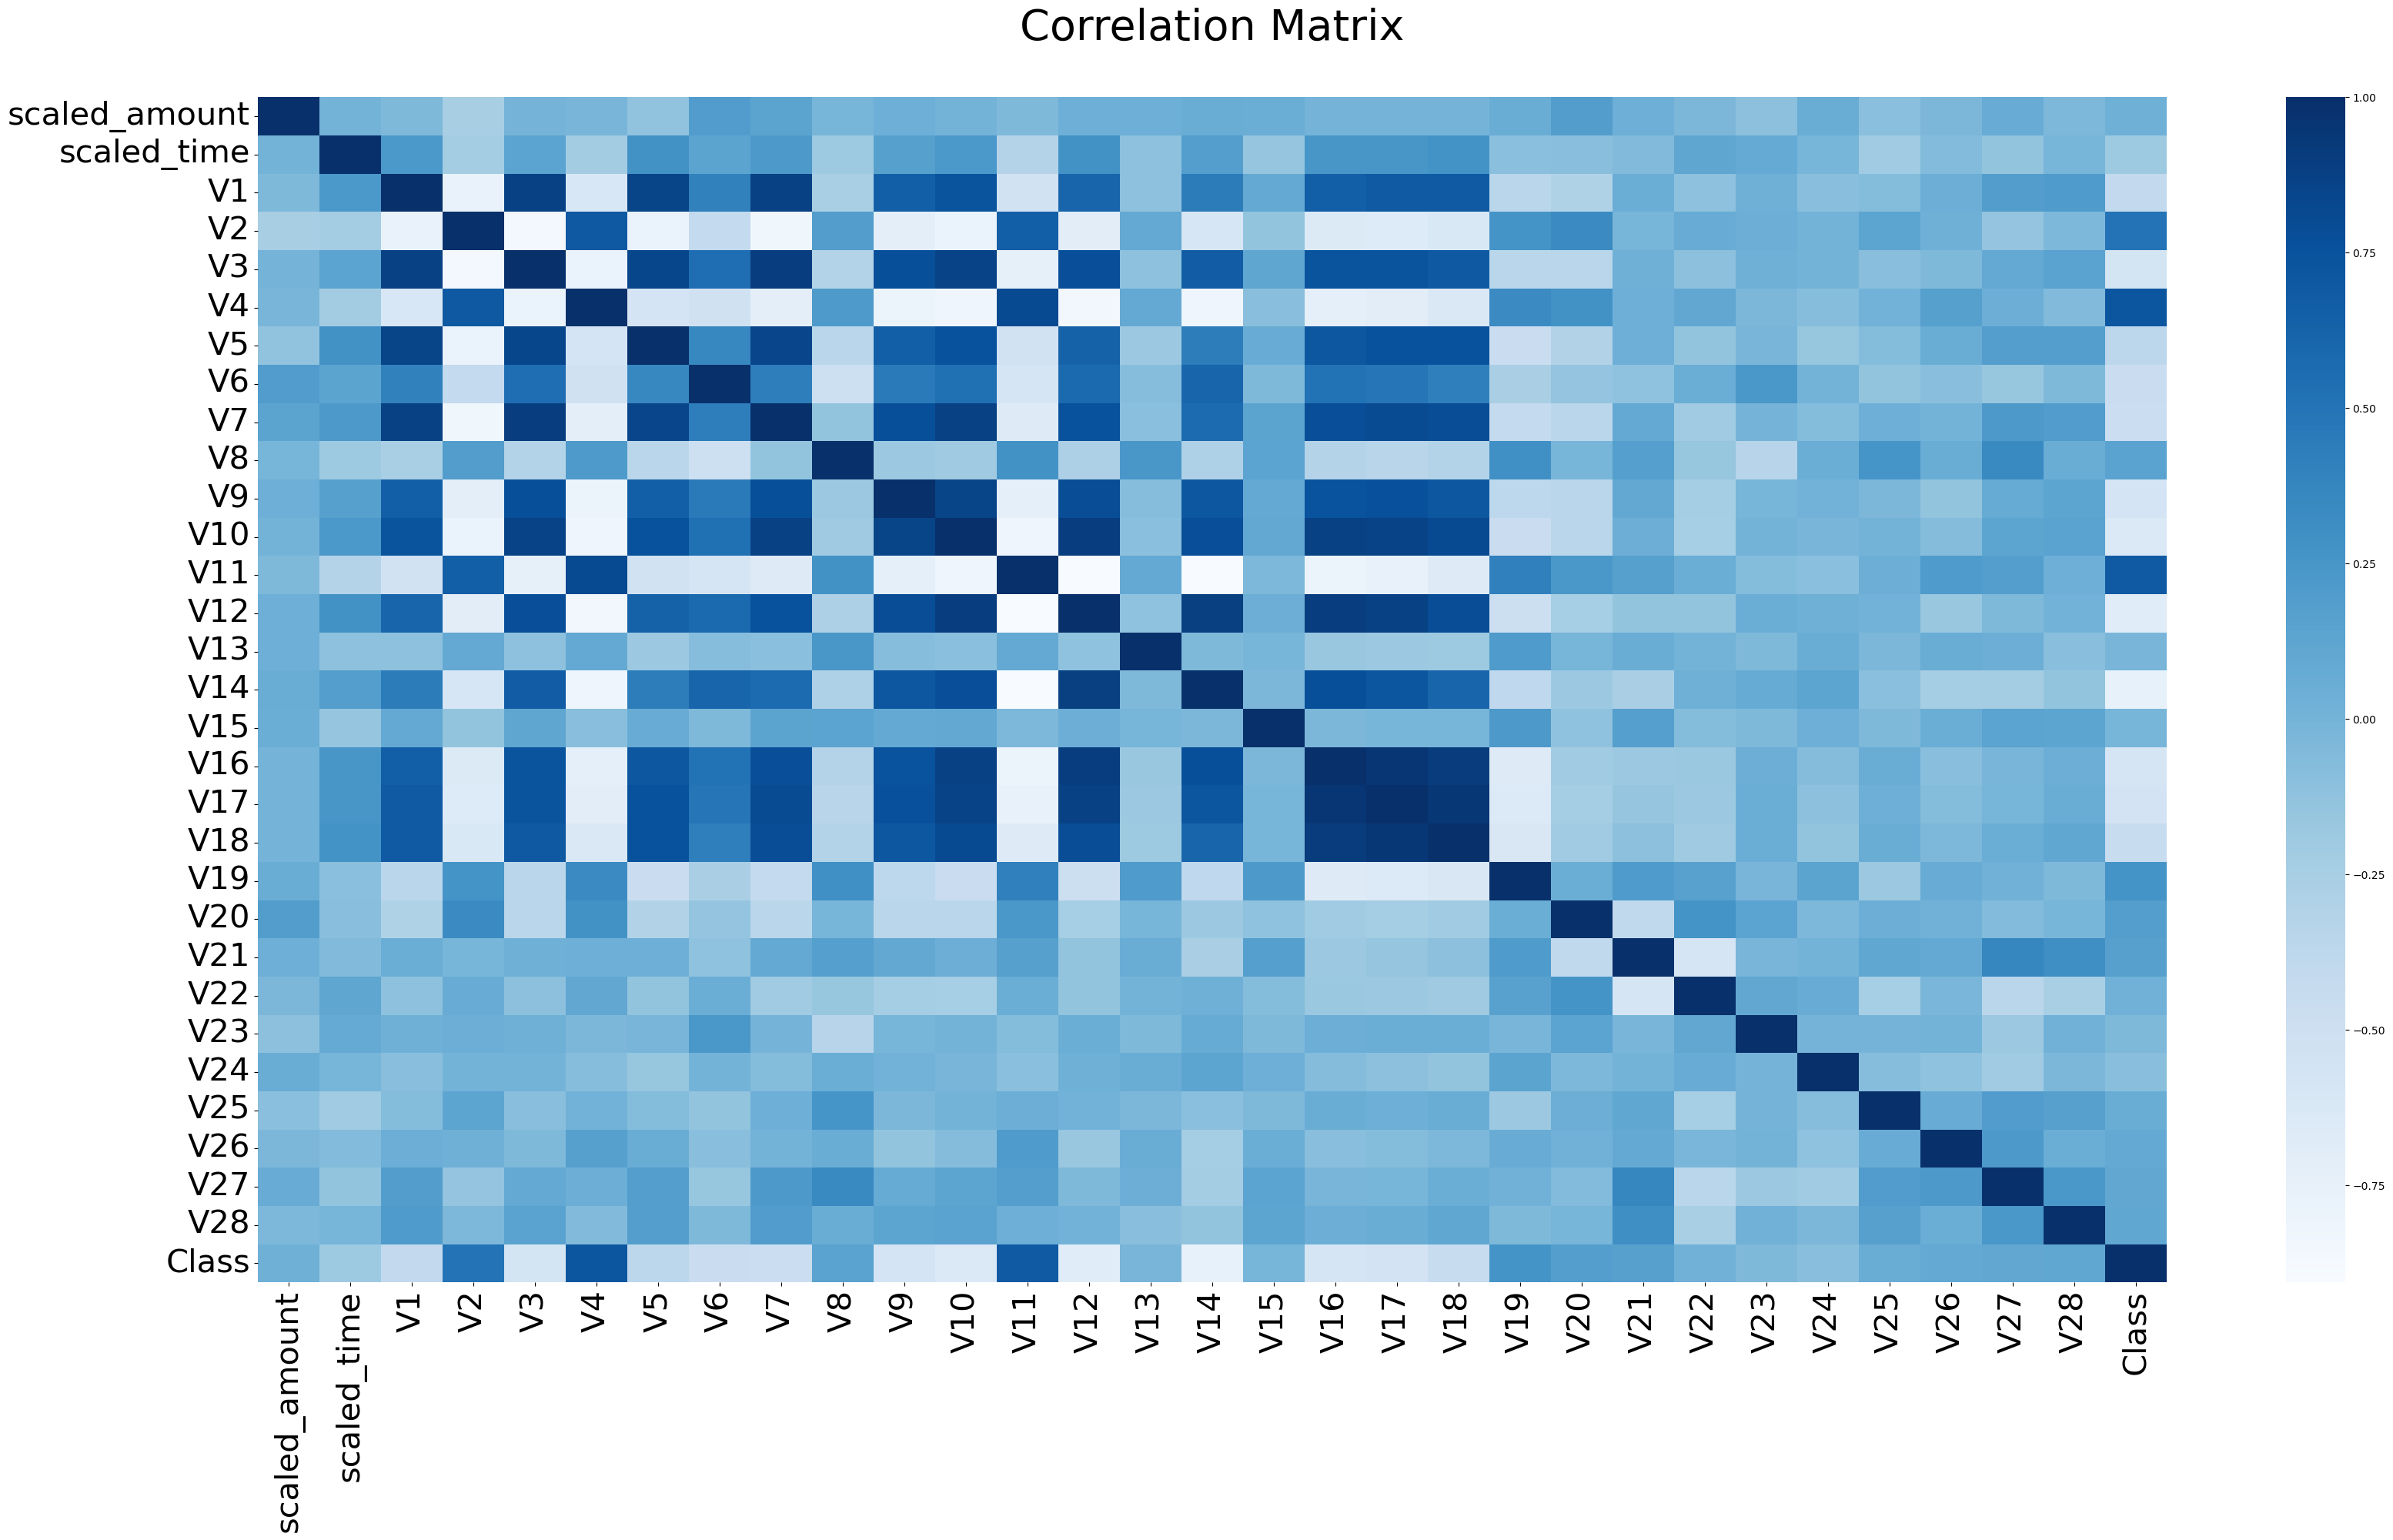

In [22]:
# Correlation 
new_df_train_corr = new_df_train.corr()

# Create a figure with the desired figsize
fig, ax = plt.subplots(figsize=(40, 20))

# Plot the heatmap with modified figsize
heatmap = sns.heatmap(new_df_train_corr, cmap='Blues', annot_kws={'size': 50}, ax=ax)

# Set the title
plt.title('Correlation Matrix\n', fontsize=40)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=30)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=30)
# Display the plot
plt.show()

In [68]:
# Top 10 most relevant indicators
corr_class = new_df_train_corr['Class'].abs().sort_values(ascending=False)
new_Columns = corr_class[1:9]
print("The most relevant indicators:\n", new_Columns)
new_Columns = new_Columns.index.tolist()
new_Columns.append('Class')
print(new_Columns)

The most relevant indicators:
 V14    0.754973
V4     0.720052
V11    0.688856
V12    0.684655
V10    0.632041
V16    0.583774
V9     0.570169
V3     0.560263
Name: Class, dtype: float64
['V14', 'V4', 'V11', 'V12', 'V10', 'V16', 'V9', 'V3', 'Class']


In [69]:
# New training data set after truncate 
new_df_train_ = new_df_train[new_Columns]
# new_df_train_.head()

# New test data set after truncate 
new_df_test = pd.read_csv('/kaggle/input/dataset11/data_test.csv')
new_df_test_ = new_df_test[new_Columns]

In [70]:
# Save new test
new_df_test_.to_csv('/kaggle/working/new_test_8.csv')

In [71]:
# new_df_train_.describe()
# new_df_test_.describe()
new_df_train_.head()

,V14,V4,V11,V12,V10,V16,V9,V3,Class
0,0.147058,3.089998,-2.439105,-0.483654,0.640276,1.796711,-1.021919,0.740574,0
1,-0.436501,-1.973551,-1.033393,-0.097335,-1.369045,1.087511,0.160397,1.478135,0
2,0.027316,0.293150,-1.319772,0.929678,-0.193898,0.647679,0.923393,-1.641857,0
3,-0.076016,0.824617,-0.823684,0.745366,-0.072544,0.356027,0.025486,0.240080,1
4,-7.083305,4.462331,6.474231,-8.489208,-5.403415,-4.633336,-0.716052,-5.685763,1


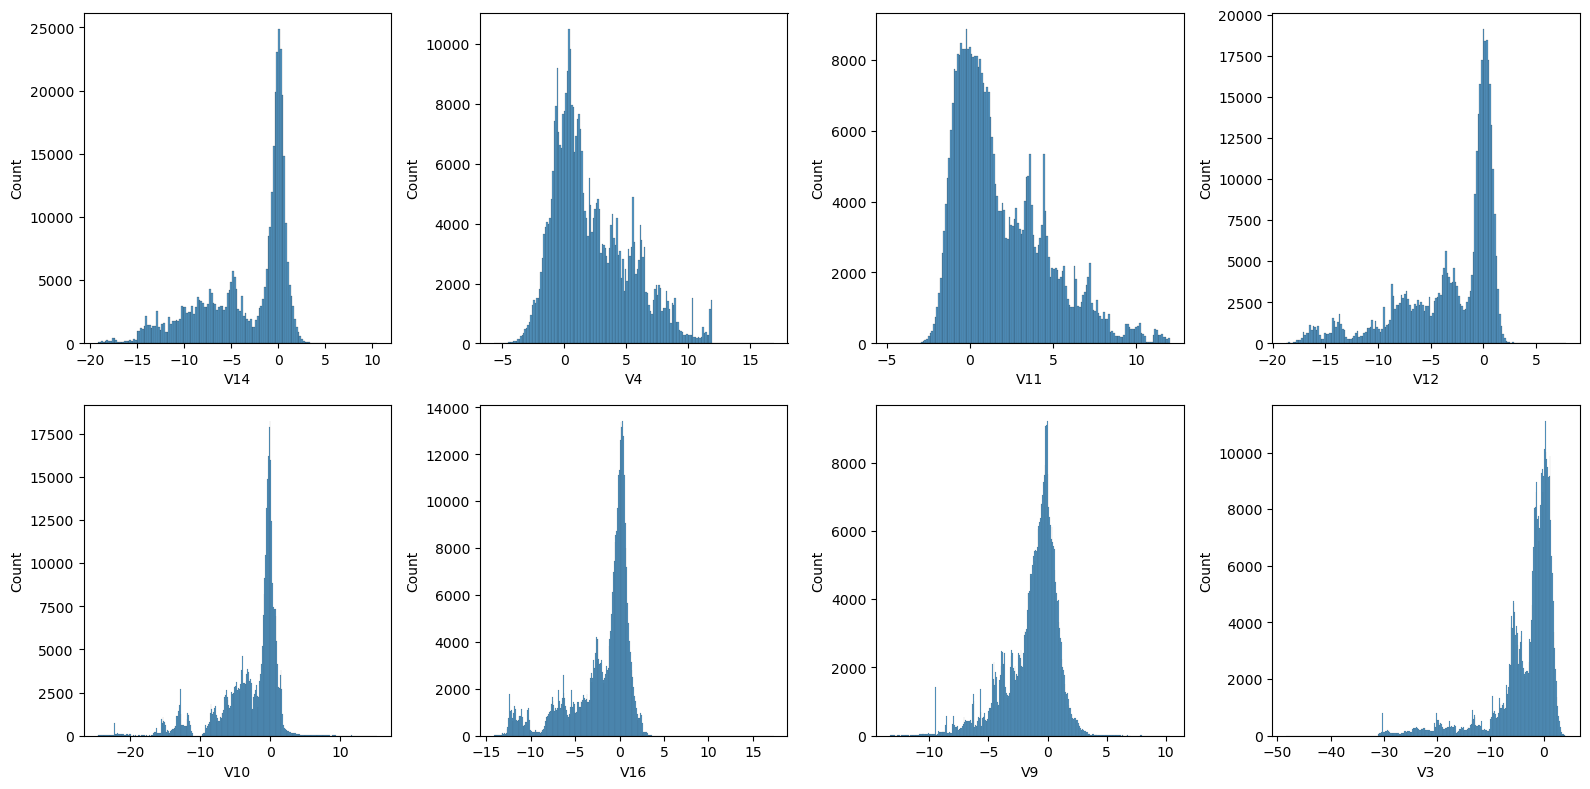

In [73]:
# Show the distribution of indicators
columns = new_df_train_.iloc[:, :-1].columns
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols 
    ax = axes[row, col]
    sns.histplot(data=new_df_train_, x=column, ax=ax)
#     ax.set_xlabel(column, rotation=45)
plt.tight_layout()   
plt.show()


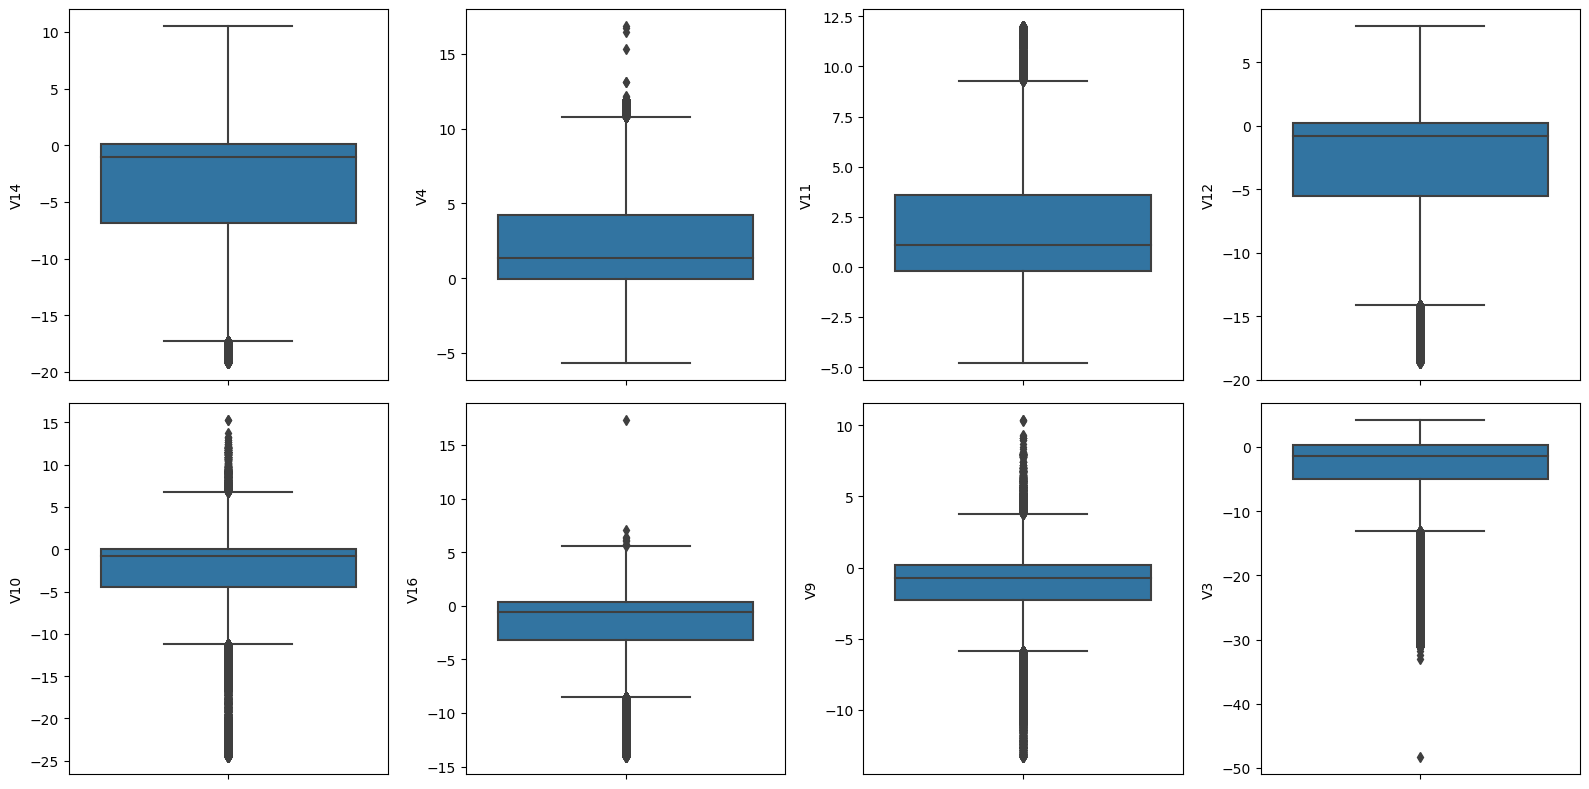

In [74]:
# Show the boxplot of indicators
columns = new_df_train_.iloc[:, :-1].columns
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols 
    ax = axes[row, col]
    sns.boxplot(data=new_df_train_, y = column, ax=ax)
#     ax.set_xlabel(column, rotation=45)
plt.tight_layout()   
plt.show()

In [82]:
new_df_train_

,V14,V4,V11,V12,V10,V16,V9,V3,Class
0,0.147058,3.089998,-2.439105,-0.483654,0.640276,1.796711,-1.021919,0.740574,0
1,-0.436501,-1.973551,-1.033393,-0.097335,-1.369045,1.087511,0.160397,1.478135,0
2,0.027316,0.293150,-1.319772,0.929678,-0.193898,0.647679,0.923393,-1.641857,0
3,-0.076016,0.824617,-0.823684,0.745366,-0.072544,0.356027,0.025486,0.240080,1
4,-7.083305,4.462331,6.474231,-8.489208,-5.403415,-4.633336,-0.716052,-5.685763,1
...,...,...,...,...,...,...,...,...,...
398011,-14.241761,6.541962,4.562377,-9.300134,-3.436736,-4.073291,-1.962905,-5.882541,1
398012,-10.939952,6.482675,5.364749,-9.587699,-6.201623,-1.954985,-2.970637,-6.210121,1
398013,0.767160,1.057104,-0.459636,-0.144100,-0.299854,-0.265035,-0.676641,0.876514,0
398014,-2.521472,-0.401895,1.420977,0.138113,-1.723592,1.035693,-0.461566,-1.085197,0


In [84]:
# remove outliers
columns = new_df_train_.iloc[:, :-1].columns
new_df_train_removeOutliers = new_df_train_
for column in columns:
    fraud_values = new_df_train_[column].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    
    iqr = q75 - q25
    cut_off = iqr * 1.5
    print('IQR_{}: {}'.format(column, iqr))
    
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(column, lower))
    print('{} Upper: {}'.format(column, upper))
#     outliers = [x for x in fraud_values if x < lower or x > upper]
    new_df_train_removeOutliers = new_df_train_removeOutliers.drop(new_df_train_removeOutliers[(new_df_train_removeOutliers[column] > upper) | (new_df_train_removeOutliers[column] < lower)].index)

new_df_train_removeOutliers


Quartile 25: -6.842150705507136 | Quartile 75: 0.10860067895416545
IQR_V14: 6.950751384461302
Cut Off: 10.426127076691953
V14 Lower: -17.26827778219909
V14 Upper: 10.534727755646118
Quartile 25: -0.08262217998360168 | Quartile 75: 4.256037114039076
IQR_V4: 4.338659294022678
Cut Off: 6.507988941034017
V4 Lower: -6.590611121017619
V4 Upper: 10.764026055073092
Quartile 25: -0.2189780007263585 | Quartile 75: 3.582227582916495
IQR_V11: 3.8012055836428535
Cut Off: 5.70180837546428
V11 Lower: -5.920786376190638
V11 Upper: 9.284035958380775
Quartile 25: -5.502122697009086 | Quartile 75: 0.218821818540952
IQR_V12: 5.720944515550038
Cut Off: 8.581416773325056
V12 Lower: -14.083539470334141
V12 Upper: 8.800238591866009
Quartile 25: -4.468425537627992 | Quartile 75: 0.012440293775245775
IQR_V10: 4.4808658314032375
Cut Off: 6.721298747104856
V10 Lower: -11.189724284732847
V10 Upper: 6.733739040880102
Quartile 25: -3.2028114840241955 | Quartile 75: 0.31334629431029276
IQR_V16: 3.516157778334488
Cut 

,V14,V4,V11,V12,V10,V16,V9,V3,Class
0,0.147058,3.089998,-2.439105,-0.483654,0.640276,1.796711,-1.021919,0.740574,0
1,-0.436501,-1.973551,-1.033393,-0.097335,-1.369045,1.087511,0.160397,1.478135,0
2,0.027316,0.293150,-1.319772,0.929678,-0.193898,0.647679,0.923393,-1.641857,0
3,-0.076016,0.824617,-0.823684,0.745366,-0.072544,0.356027,0.025486,0.240080,1
4,-7.083305,4.462331,6.474231,-8.489208,-5.403415,-4.633336,-0.716052,-5.685763,1
...,...,...,...,...,...,...,...,...,...
398011,-14.241761,6.541962,4.562377,-9.300134,-3.436736,-4.073291,-1.962905,-5.882541,1
398012,-10.939952,6.482675,5.364749,-9.587699,-6.201623,-1.954985,-2.970637,-6.210121,1
398013,0.767160,1.057104,-0.459636,-0.144100,-0.299854,-0.265035,-0.676641,0.876514,0
398014,-2.521472,-0.401895,1.420977,0.138113,-1.723592,1.035693,-0.461566,-1.085197,0


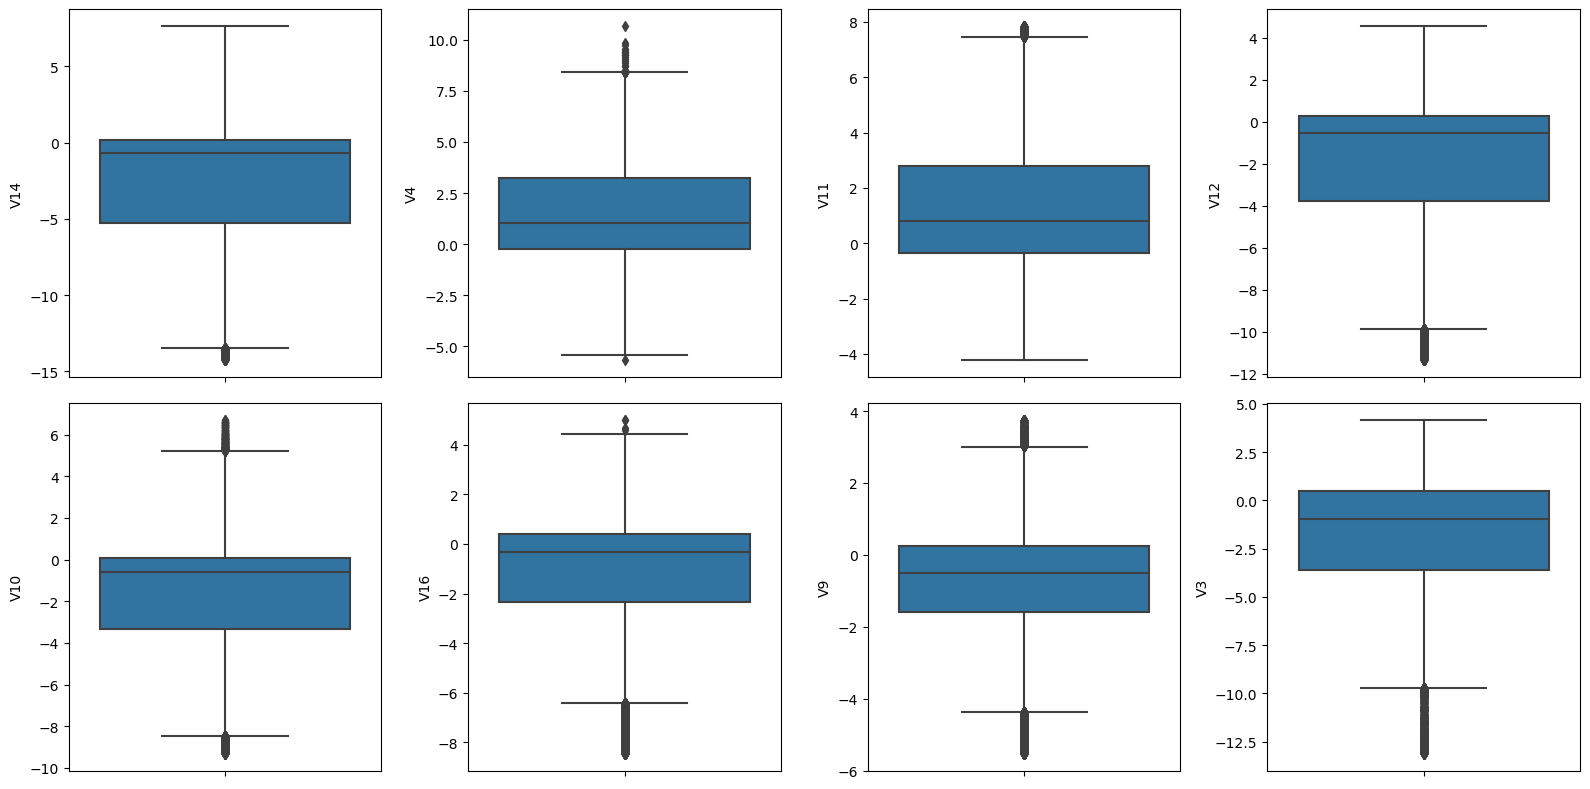

In [85]:
# Show the boxplot of indicators after remove the outliers
columns = new_df_train_removeOutliers.iloc[:, :-1].columns
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols 
    ax = axes[row, col]
    sns.boxplot(data=new_df_train_removeOutliers, y = column, ax=ax)
#     ax.set_xlabel(column, rotation=45)
plt.tight_layout()   
plt.show()

In [86]:
new_df_train_removeOutliers.to_csv('/kaggle/working/new_train8_removeOutliers.csv')

In [2]:
train = pd.read_csv("/kaggle/input/mscdata/new_train8_removeOutliers.csv")

In [6]:
train['Class'].value_counts()

0    197960
1    158947
Name: Class, dtype: int64